
### Analyzing Consumer Trends and Fraud Detection in large-Scale Transactions
"""

  Hanok Tamang  | 2358903 | h.tamang@wlv.ac.uk 

  Mayank Baryal | 2358903 | m.baryal@wlv.ac.uk
  
"""

### 1. Data Import

In [1]:
# imported the excel files 

import pandas as pd

file2 = "DATASET/apr-jun-2018-3rd-qtr-gsa-pc-transactions.xlsx"
file1 = "DATASET/jan-march-2018-gsa-pc-transactions.xlsx"
file3 = "DATASET/jul-sep-2018-gsa-pc-transactions.xlsx"

# Load the first sheet from each Excel file
xls1 = pd.ExcelFile(file1)
xls2 = pd.ExcelFile(file2)
xls3 = pd.ExcelFile(file3)
# Checking sheet names
sheets1 = xls1.sheet_names
sheets2 = xls2.sheet_names
sheets3 = xls3.sheet_names

print(sheets1,sheets2, sheets3)

# Load first sheet from each file
df1 = xls1.parse(sheets1[0])
df2 = xls2.parse(sheets2[0])
df3 = xls3.parse(sheets3[0])

# Display column names and first few rows from each dataset
df1_info = {"columns": df1.columns.tolist()}
df2_info = {"columns": df2.columns.tolist()}
df3_info = {"columns": df3.columns.tolist()}

print(len(df1_info["columns"]))
print(len(df2_info["columns"]))
print(len(df3_info["columns"]))

df1_info, df2_info, df3_info

['Transaction Report - OPEN DATA '] ['APR JUN 2018 3rd Qtr'] ['Sheet1', 'Sheet2', 'Sheet3']
18
20
18


({'columns': ['Program',
   'Region',
   'Hierarchy Level 3 Name',
   'Cardholder First Name',
   'Cardholder Last Name',
   'Merchant Name',
   'Merchant Property Address',
   'Merchant City',
   'Merchant State',
   'Merchant Zip',
   'Merchant Phone',
   'MCC',
   'MCC Description',
   'Transaction Date',
   'Transaction Post Date',
   'Transaction Amount',
   'Transaction Type',
   'Transaction DB-CR Indicator']},
 {'columns': ['Hierarchy Level 1 Name',
   'Hierarchy Level 2 Name',
   'Hierarchy Level 3',
   'Hierarchy Level 3 Name',
   'Account Name (Short)',
   'Cardholder First Name',
   'Cardholder Last Name',
   'Merchant Name',
   'Merchant Property Address',
   'Merchant City',
   'Merchant State',
   'Merchant Zip',
   'Merchant Phone',
   'MCC',
   'MCC Description',
   'Transaction Date',
   'Transaction Post Date',
   'Transaction Amount',
   'Transaction Type',
   'Transaction DB-CR Indicator']},
 {'columns': ['Program',
   'Region',
   'Service/Staff Office',
   'Cardh

### 2. Data Cleaning

In [2]:
# renaming the column name of second excel file

df2_new = df2.rename(columns = {
    'Hierarchy Level 1 Name': 'Program',
    'Hierarchy Level 2 Name': 'Region',
    'Hierarchy Level 3 Name': 'Hierarchy Level 3 Name',
    'Cardholder First Name': 'Cardholder First Name',
    'Cardholder Last Name': 'Cardholder Last Name',
    'Merchant Name': 'Merchant Name',
    'Merchant Property Address': 'Merchant Property Address',
    'Merchant City': 'Merchant City',
    'Merchant State': 'Merchant State',
    'Merchant Zip': 'Merchant Zip',
    'Merchant Phone': 'Merchant Phone',
    'MCC': 'MCC',
    'MCC Description': 'MCC Description',
    'Transaction Date': 'Transaction Date',
    'Transaction Post Date': 'Transaction Post Date',
    'Transaction Amount': 'Transaction Amount',
    'Transaction Type': 'Transaction Type',
    'Transaction DB-CR Indicator': 'Transaction DB-CR Indicator'
})

# dropping unnecessary columns
df2_new = df2_new.drop(['Hierarchy Level 3','Account Name (Short)'], axis = 1)
print(df2_new.columns.tolist())
len(df2_new.columns)

['Program', 'Region', 'Hierarchy Level 3 Name', 'Cardholder First Name', 'Cardholder Last Name', 'Merchant Name', 'Merchant Property Address', 'Merchant City', 'Merchant State', 'Merchant Zip', 'Merchant Phone', 'MCC', 'MCC Description', 'Transaction Date', 'Transaction Post Date', 'Transaction Amount', 'Transaction Type', 'Transaction DB-CR Indicator']


18

In [3]:
# renaming the column name of third excel file
df3_new = df3.rename(columns = {
    'Service/Staff Office': 'Hierarchy Level 3 Name'
})

print(df3_new.columns.tolist())
len(df3_new.columns)  

['Program', 'Region', 'Hierarchy Level 3 Name', 'Cardholder First Name', 'Cardholder Last Name', 'Merchant Name', 'Merchant Property Address', 'Merchant City', 'Merchant State', 'Merchant Zip', 'Merchant Phone', 'MCC', 'MCC Description', 'Transaction Date', 'Transaction Post Date', 'Transaction Amount', 'Transaction Type', 'Transaction DB-CR Indicator']


18

In [4]:
# standarized the columns names.

def standardized_col_names(df):
    df.columns = df.columns.str.strip().str.lower()
    return df
    
df1_standard = standardized_col_names(df1)
df2_standard = standardized_col_names(df2_new)
df3_standard = standardized_col_names(df3_new)

df1_standard.info()
print(df1_standard.isnull().sum())
print(df2_standard.isnull().sum())
print(df3_standard.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      8096 non-null   object        
 1   region                       8096 non-null   object        
 2   hierarchy level 3 name       8096 non-null   object        
 3   cardholder first name        8091 non-null   object        
 4   cardholder last name         8096 non-null   object        
 5   merchant name                8096 non-null   object        
 6   merchant property address    7955 non-null   object        
 7   merchant city                8096 non-null   object        
 8   merchant state               8068 non-null   object        
 9   merchant zip                 8096 non-null   int64         
 10  merchant phone               5936 non-null   object        
 11  mcc                          8096 non-null 

In [5]:
# dropping unncessary columns 
def drop_unwanted_columns(df):
    return df.drop(['merchant phone', 'merchant property address', 'merchant city'], axis=1)

df1_standard = drop_unwanted_columns(df1_standard)
df2_standard = drop_unwanted_columns(df2_standard)
df3_standard = drop_unwanted_columns(df3_standard)

print("First dataframe:\n")
print(df1_standard.isnull().sum())
print("\nSecond dataframe:\n")
print(df2_standard.isnull().sum())
print("\nThirddataframe:\n")
print(df3_standard.isnull().sum())

First dataframe:

program                         0
region                          0
hierarchy level 3 name          0
cardholder first name           5
cardholder last name            0
merchant name                   0
merchant state                 28
merchant zip                    0
mcc                             0
mcc description                 0
transaction date                0
transaction post date           0
transaction amount              0
transaction type                0
transaction db-cr indicator     0
dtype: int64

Second dataframe:

program                         0
region                          0
hierarchy level 3 name          0
cardholder first name           2
cardholder last name            0
merchant name                   0
merchant state                 35
merchant zip                    0
mcc                             0
mcc description                 0
transaction date                0
transaction post date           0
transaction amount             

In [6]:
# row and column data

print(df1_standard.shape)
print(df2_standard.shape)
print(df3_standard.shape)

(8096, 15)
(8707, 15)
(10526, 15)


In [7]:
# dropping and checking null values

df1_cleaned = df1_standard.dropna()
print(df1_cleaned.isnull().sum())
df1_cleaned.shape

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64


(8063, 15)

In [8]:
# dropping and checking null values

df2_cleaned = df2_standard.dropna()
print(df2_cleaned.isnull().sum())
df2_cleaned.shape

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64


(8670, 15)

In [9]:
# dropping and checking null values

df3_cleaned = df3_standard.dropna()
print(df3_cleaned.isnull().sum())
df3_cleaned.shape

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64


(10504, 15)

In [10]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8063 entries, 0 to 8095
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      8063 non-null   object        
 1   region                       8063 non-null   object        
 2   hierarchy level 3 name       8063 non-null   object        
 3   cardholder first name        8063 non-null   object        
 4   cardholder last name         8063 non-null   object        
 5   merchant name                8063 non-null   object        
 6   merchant state               8063 non-null   object        
 7   merchant zip                 8063 non-null   int64         
 8   mcc                          8063 non-null   int64         
 9   mcc description              8063 non-null   object        
 10  transaction date             8063 non-null   datetime64[ns]
 11  transaction post date        8063 non-null   dat

In [11]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8670 entries, 0 to 8706
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      8670 non-null   object        
 1   region                       8670 non-null   object        
 2   hierarchy level 3 name       8670 non-null   object        
 3   cardholder first name        8670 non-null   object        
 4   cardholder last name         8670 non-null   object        
 5   merchant name                8670 non-null   object        
 6   merchant state               8670 non-null   object        
 7   merchant zip                 8670 non-null   int64         
 8   mcc                          8670 non-null   int64         
 9   mcc description              8670 non-null   object        
 10  transaction date             8670 non-null   datetime64[ns]
 11  transaction post date        8670 non-null   dat

In [12]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10504 entries, 0 to 10524
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      10504 non-null  object        
 1   region                       10504 non-null  object        
 2   hierarchy level 3 name       10504 non-null  object        
 3   cardholder first name        10504 non-null  object        
 4   cardholder last name         10504 non-null  object        
 5   merchant name                10504 non-null  object        
 6   merchant state               10504 non-null  object        
 7   merchant zip                 10504 non-null  float64       
 8   mcc                          10504 non-null  float64       
 9   mcc description              10504 non-null  object        
 10  transaction date             10504 non-null  datetime64[ns]
 11  transaction post date        10504 non-null  d

In [13]:
# standardizing the dates

for df in [df1_cleaned, df2_cleaned, df3_cleaned]:
    df.loc[:, 'transaction date'] = df['transaction date'].dt.strftime('%Y-%m-%d')
    df.loc[:, 'transaction post date'] = df['transaction post date'].dt.strftime('%Y-%m-%d')

df1_cleaned.to_csv('DATASET/cleaned_jan.csv', index=False)
df2_cleaned.to_csv('DATASET/cleaned_april.csv', index=False)
df3_cleaned.to_csv('DATASET/cleaned_jul.csv', index=False)

In [14]:
# merging 3 excel file into one

merged_df = pd.concat([df1_cleaned, df2_cleaned, df3_cleaned])
merged_df.shape
merged_df.to_csv('DATASET/merged_data.csv', index = False)

In [15]:
# final check for null values

merged_df.isnull().sum()

program                        0
region                         0
hierarchy level 3 name         0
cardholder first name          0
cardholder last name           0
merchant name                  0
merchant state                 0
merchant zip                   0
mcc                            0
mcc description                0
transaction date               0
transaction post date          0
transaction amount             0
transaction type               0
transaction db-cr indicator    0
dtype: int64

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27237 entries, 0 to 10524
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   program                      27237 non-null  object        
 1   region                       27237 non-null  object        
 2   hierarchy level 3 name       27237 non-null  object        
 3   cardholder first name        27237 non-null  object        
 4   cardholder last name         27237 non-null  object        
 5   merchant name                27237 non-null  object        
 6   merchant state               27237 non-null  object        
 7   merchant zip                 27237 non-null  float64       
 8   mcc                          27237 non-null  float64       
 9   mcc description              27237 non-null  object        
 10  transaction date             27237 non-null  datetime64[ns]
 11  transaction post date        27237 non-null  d

In [17]:
# row and column after merged

merged_df.shape

(27237, 15)

In [18]:
merged_df.describe()

,merchant zip,mcc,transaction date,transaction post date,transaction amount
count,2.723700e+04,27237.000000,27237,27237,27237.000000
mean,4.708468e+08,5924.270955,2018-05-24 20:49:18.035025664,2018-05-26 12:58:45.850864384,808.986330
min,0.000000e+00,763.000000,2017-11-28 00:00:00,2018-01-02 00:00:00,-20534.940000
25%,2.019000e+08,5021.000000,2018-03-16 00:00:00,2018-03-19 00:00:00,120.000000
50%,3.811600e+08,5943.000000,2018-05-24 00:00:00,2018-05-28 00:00:00,400.000000
75%,7.861300e+08,7399.000000,2018-08-07 00:00:00,2018-08-09 00:00:00,1175.000000
max,9.990100e+08,9402.000000,2018-09-28 00:00:00,2018-09-28 00:00:00,28051.000000
std,3.200342e+08,2174.690041,NaN,NaN,1199.137713


### 3. Data Visualisation

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('DATASET/merged_data.csv')


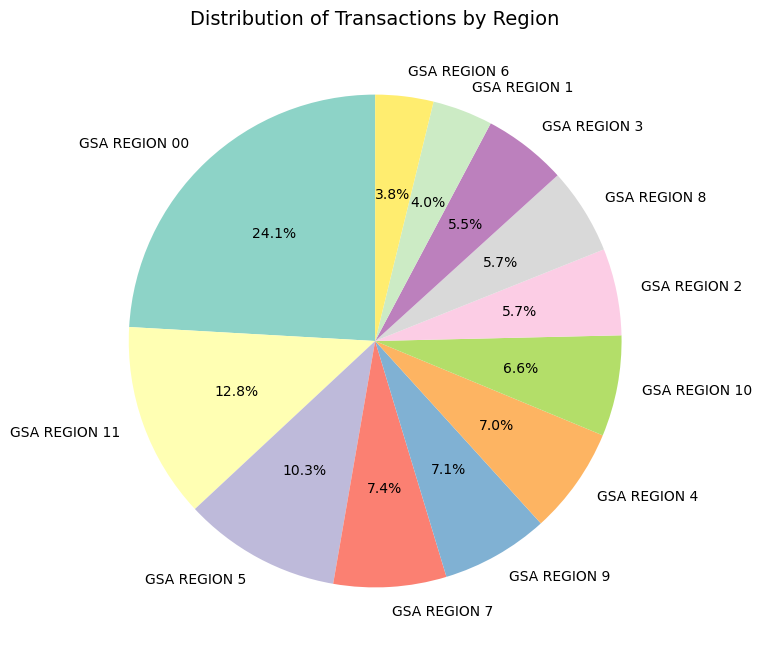

In [20]:
# 2. Pie Chart of Transactions by Region
region_counts = data['region'].value_counts()
plt.figure(figsize=(8, 8))
region_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3', n_colors=len(region_counts)), startangle=90)
plt.title('Distribution of Transactions by Region', fontsize=14)
plt.savefig('Distribution of Transactions by Region',dpi=300, bbox_inches='tight')
plt.ylabel('')
plt.show()

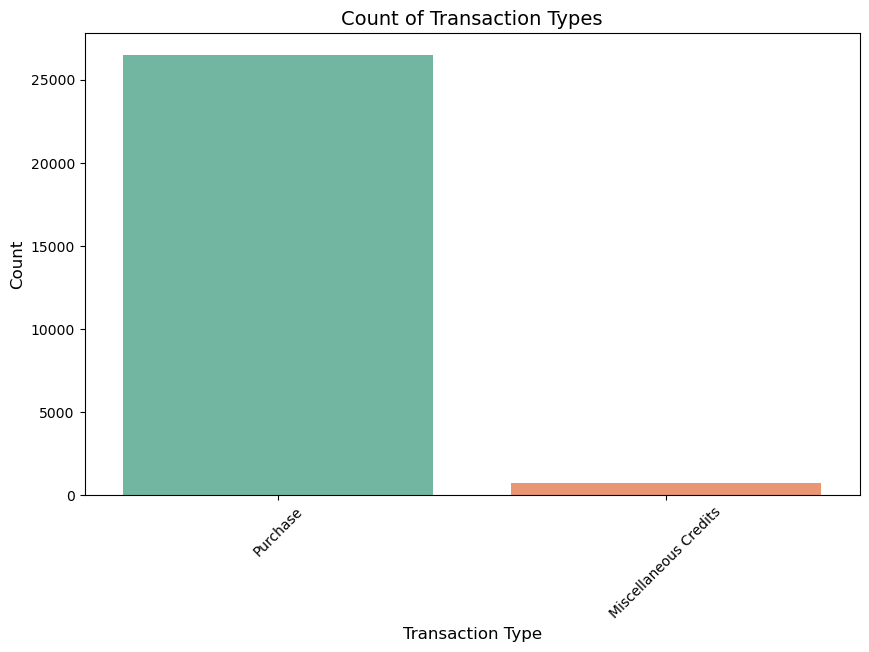

In [21]:
# ---------------------------
# 2. Transaction Type Counts
plt.figure(figsize=(10, 6))
x='transaction type'
sns.countplot(x='transaction type', data=data, palette='Set2', hue=x, legend = False)
plt.title('Count of Transaction Types', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()




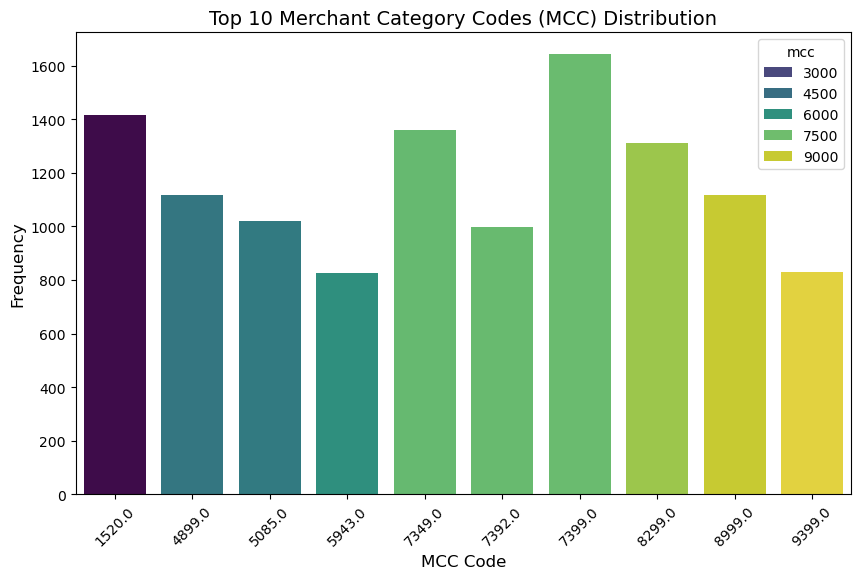

In [22]:

# ---------------------------
# 5. Merchant Category Code (MCC) Distribution (Top 10)
top_mcc = data['mcc'].value_counts().head(10)  # Get top 10 most frequent MCC codes
plt.figure(figsize=(10, 6))
x = top_mcc.index
sns.barplot(x=top_mcc.index, y=top_mcc.values, palette='viridis', hue = x)
plt.title('Top 10 Merchant Category Codes (MCC) Distribution', fontsize=14)
plt.savefig('Top 10 Merchant Category Codes (MCC) Distribution',dpi=300, bbox_inches='tight')
plt.xlabel('MCC Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()



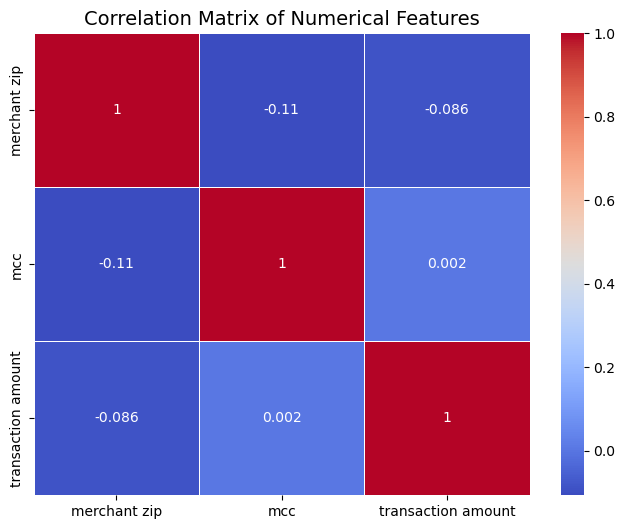

In [23]:
numerical_columns = data.select_dtypes(include=['number']).columns

# ---------------------------
# 6. Correlation Matrix of Numerical Features
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

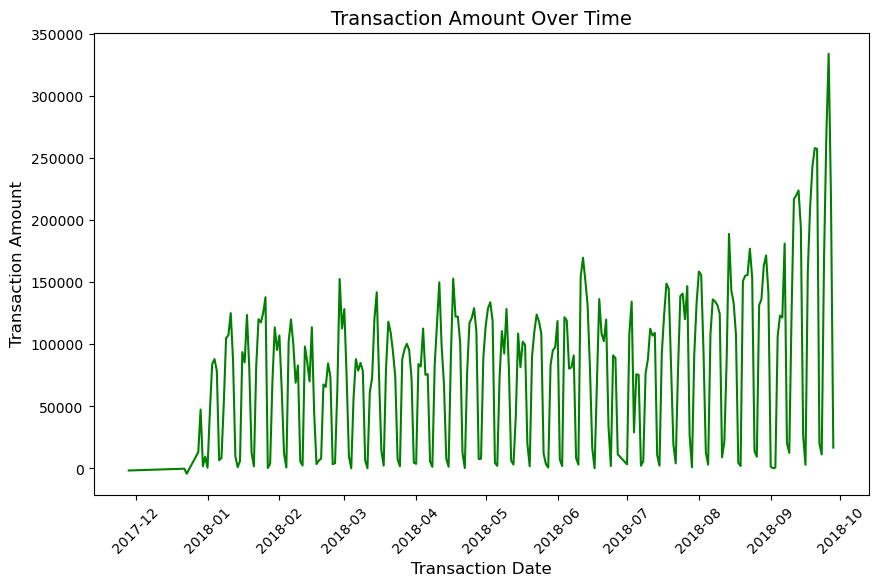

In [24]:

# ---------------------------
# 6. Transaction Amount Over Time (if date is present)
if 'transaction date' in data.columns:
    # Convert 'transaction date' to datetime
    data['transaction date'] = pd.to_datetime(data['transaction date'])
    
    # Aggregate transaction amount by date
    transaction_over_time = data.groupby('transaction date')['transaction amount'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(transaction_over_time['transaction date'], transaction_over_time['transaction amount'], color='green')
    plt.title('Transaction Amount Over Time', fontsize=14)
    plt.xlabel('Transaction Date', fontsize=12)
    plt.ylabel('Transaction Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Mayank Baryal\AppData\Local\Temp\ipykernel_8360\3941680203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='transaction amount', data=data, palette='coolwarm')


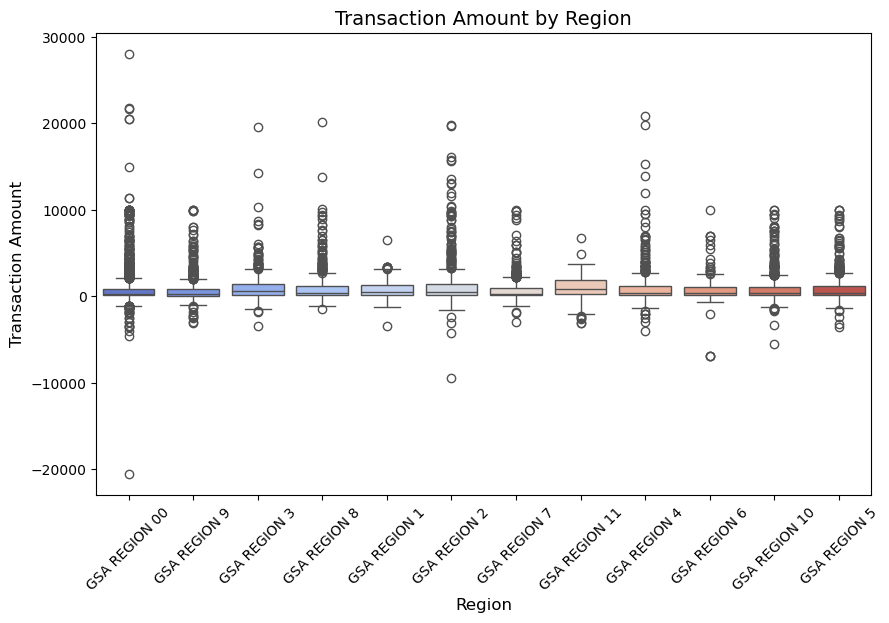

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='transaction amount', data=data, palette='coolwarm')
plt.title('Transaction Amount by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()

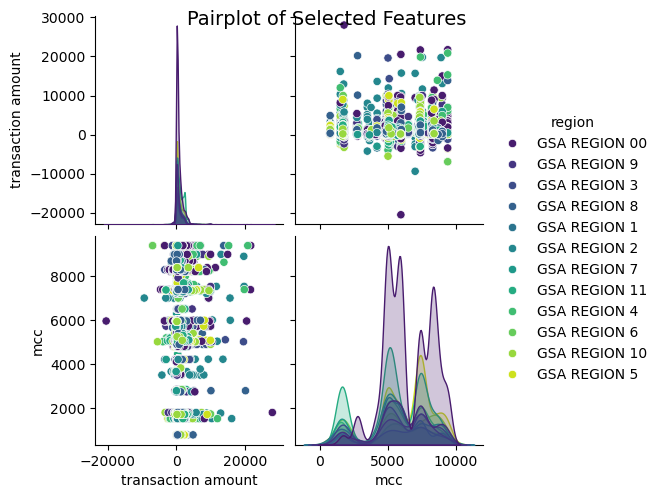

In [26]:
selected_features = ['transaction amount', 'mcc', 'region']
sns.pairplot(data[selected_features], hue='region', palette='viridis')
plt.savefig('Pairplot of Selected Features',dpi=300, bbox_inches='tight')
plt.suptitle('Pairplot of Selected Features', fontsize=14)
plt.show()

C:\Users\Mayank Baryal\AppData\Local\Temp\ipykernel_8360\97802890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='transaction amount', data=data, palette='coolwarm')


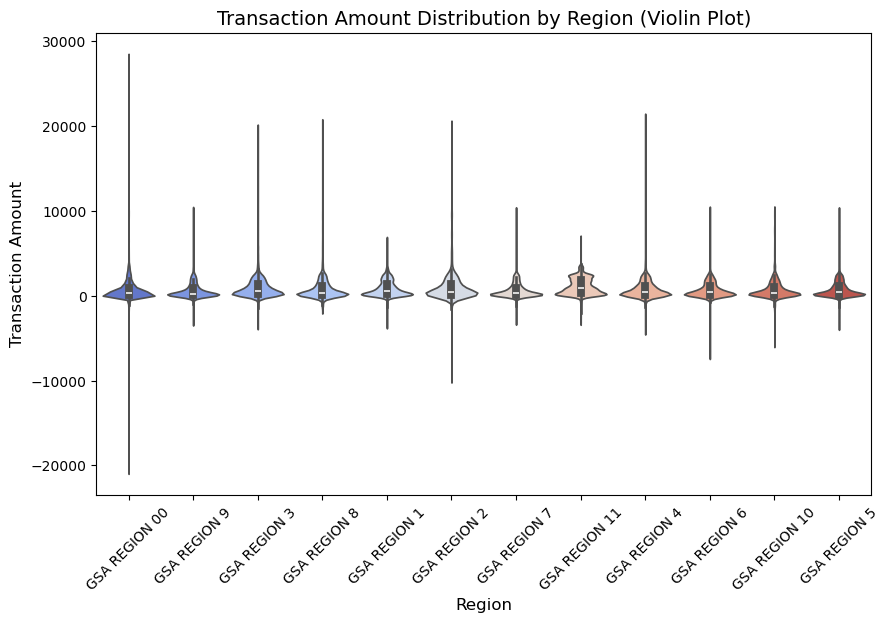

In [27]:
# 8. Violin Plot of Transaction Amount by Region
plt.figure(figsize=(10, 6))
sns.violinplot(x='region', y='transaction amount', data=data, palette='coolwarm')
plt.title('Transaction Amount Distribution by Region (Violin Plot)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [28]:
merged_df.head()


,program,region,hierarchy level 3 name,cardholder first name,cardholder last name,merchant name,merchant state,merchant zip,mcc,mcc description,transaction date,transaction post date,transaction amount,transaction type,transaction db-cr indicator
0,GSA PURCHASE,GSA REGION 00,OFC OF CIVIL RIGHTS (OCR),CATHERINE,LONG,"ART OF RESOLUTION, LLC",VA,223110000.0,7392.0,"CONSULTING, MANAGEMENT, AND PUBLIC RELATIONS SVCS",2018-01-18,2018-01-19,1090.00,Purchase,Debit
1,GSA PURCHASE,GSA REGION 00,OFC OF CIVIL RIGHTS (OCR),CATHERINE,LONG,BATTERIES PLUS 448,VA,201510000.0,5999.0,Miscellaneous and Specialty Retail Stores,2018-02-05,2018-02-06,-201.39,Miscellaneous Credits,Credit
2,GSA PURCHASE,GSA REGION 00,OFC OF CIVIL RIGHTS (OCR),CATHERINE,LONG,BATTERIES PLUS 448,VA,201510000.0,5999.0,Miscellaneous and Specialty Retail Stores,2018-02-02,2018-02-05,201.39,Purchase,Debit
3,GSA PURCHASE,GSA REGION 00,OFC OF CIVIL RIGHTS (OCR),CATHERINE,LONG,BATTERIES PLUS 448,VA,201510000.0,5999.0,Miscellaneous and Specialty Retail Stores,2018-02-05,2018-02-06,189.99,Purchase,Debit
4,GSA PURCHASE,GSA REGION 00,OFC OF CIVIL RIGHTS (OCR),CATHERINE,LONG,EB STRATEGIC INTERNAL,CA,941030000.0,7399.0,Business Services - Not Elsewhere Classified,2018-02-05,2018-02-06,1895.00,Purchase,Debit


In [29]:
merged_df.columns

Index(['program', 'region', 'hierarchy level 3 name', 'cardholder first name',
       'cardholder last name', 'merchant name', 'merchant state',
       'merchant zip', 'mcc', 'mcc description', 'transaction date',
       'transaction post date', 'transaction amount', 'transaction type',
       'transaction db-cr indicator'],
      dtype='object')

In [30]:
# ─── Step 0: Prepare features with One-Hot Encoding ────────────────────────────────

import pandas as pd

# 1. Reference your cleaned DataFrame
df_clean = merged_df  # <-- replace with your DataFrame name

# 2. Select relevant columns
selected_cols = [
    "transaction amount",
    "mcc",
    "merchant state",
    "transaction type",
    "transaction db-cr indicator"
]
feature_data = df_clean[selected_cols].copy()

# 3. One-hot encode categorical columns
categorical_cols = [
    "mcc",
    "merchant state",
    "transaction type",
    "transaction db-cr indicator"
]
features = pd.get_dummies(feature_data, columns=categorical_cols, drop_first=True)

# 4. Fill missing values
features = features.fillna(0)

print("Features shape:", features.shape)
features.head()


# ─── Section 1: Running Models Individually ────────────────────────────────────────

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
kmeans_distances = np.linalg.norm(
    X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1
)

# 3. Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100, contamination=0.01, random_state=42
)
iso_forest.fit(X_scaled)
iso_scores = -iso_forest.decision_function(X_scaled)  # higher = more anomalous

# 4. Build anomaly_df
anomaly_df = features.copy()
anomaly_df["kmeans_score"] = kmeans_distances
anomaly_df["iso_score"]    = iso_scores

# 5. Normalize scores
anomaly_df["kmeans_score_norm"] = (
    anomaly_df["kmeans_score"] - anomaly_df["kmeans_score"].min()
) / (
    anomaly_df["kmeans_score"].max() - anomaly_df["kmeans_score"].min()
)
anomaly_df["iso_score_norm"] = (
    anomaly_df["iso_score"] - anomaly_df["iso_score"].min()
) / (
    anomaly_df["iso_score"].max() - anomaly_df["iso_score"].min()
)

print("Section 1 complete — sample scores:")
print(anomaly_df[["kmeans_score_norm", "iso_score_norm"]].head())


# ─── Section 2: Combining Anomaly Scores (Ensemble) ─────────────────────────────────

# 1. Ensemble score (max of norms)
anomaly_df["ensemble_score"] = anomaly_df[
    ["kmeans_score_norm", "iso_score_norm"]
].max(axis=1)

# 2. Flag anomalies
threshold = 0.85  # tune this threshold
anomaly_df["is_anomaly"] = (
    anomaly_df["ensemble_score"] > threshold
).astype(int)

print("Section 2 complete — top anomalies:")
print(
    anomaly_df.sort_values("ensemble_score", ascending=False)
    .head(10)[["ensemble_score", "is_anomaly"]]
)


# ─── Section 3: LSTM Autoencoder for Sequence Anomalies ─────────────────────────────

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    LSTM,
    RepeatVector,
    TimeDistributed,
    Dense,
)
from sklearn.preprocessing import StandardScaler

# 1. Sort chronologically if needed
# df_clean = df_clean.sort_values("transaction date")
# and rebuild features and anomaly_df indices accordingly

# 2. Build sliding windows
seq_len = 10
data_vals = features.values
sequences = np.array([
    data_vals[i : i + seq_len]
    for i in range(len(data_vals) - seq_len)
])

# 3. Scale sequences
flat = sequences.reshape(-1, sequences.shape[2])
scaler_seq = StandardScaler().fit(flat)
sequences_scaled = scaler_seq.transform(flat).reshape(sequences.shape)

# 4. Build LSTM Autoencoder
n_features = sequences_scaled.shape[2]
inputs = Input(shape=(seq_len, n_features))
encoded   = LSTM(64, activation="relu", return_sequences=False)(inputs)
bottleneck= RepeatVector(seq_len)(encoded)
decoded   = LSTM(64, activation="relu", return_sequences=True)(bottleneck)
outputs   = TimeDistributed(Dense(n_features))(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer="adam", loss="mse")

# 5. Train
history = autoencoder.fit(
    sequences_scaled,
    sequences_scaled,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
)

# 6. Compute reconstruction errors
sequences_pred = autoencoder.predict(sequences_scaled)
recon_errors   = np.mean(
    np.square(sequences_pred - sequences_scaled), axis=(1, 2)
)

# 7. Align errors with anomaly_df
lstm_df = pd.DataFrame(
    {"recon_error": recon_errors},
    index=anomaly_df.index[seq_len:]
)
lstm_df["is_anomaly_lstm"] = (
    lstm_df["recon_error"] > np.percentile(recon_errors, 95)
).astype(int)

anomaly_df = anomaly_df.iloc[seq_len:].copy()
anomaly_df["recon_error"]       = lstm_df["recon_error"]
anomaly_df["is_anomaly_lstm"]   = lstm_df["is_anomaly_lstm"]

# 8. Normalize LSTM errors
anomaly_df["lstm_score_norm"] = (
    anomaly_df["recon_error"] - anomaly_df["recon_error"].min()
) / (
    anomaly_df["recon_error"].max() - anomaly_df["recon_error"].min()
)

# 9. Extended ensemble
anomaly_df["ensemble_score"] = anomaly_df[
    ["kmeans_score_norm", "iso_score_norm", "lstm_score_norm"]
].max(axis=1)
anomaly_df["is_anomaly"] = (
    anomaly_df["ensemble_score"] > threshold
).astype(int)

print("Section 3 complete — final top anomalies:")
print(
    anomaly_df.sort_values("ensemble_score", ascending=False)
    .head(10)[[
        "kmeans_score_norm",
        "iso_score_norm",
        "lstm_score_norm",
        "ensemble_score",
        "is_anomaly"
    ]]
)


Features shape: (27237, 272)
Section 1 complete — sample scores:
   kmeans_score_norm  iso_score_norm
0           0.036192        0.307706
1           0.070624        0.607941
2           0.050069        0.298903
3           0.050073        0.298903
4           0.032357        0.326558
Section 2 complete — top anomalies:
      ensemble_score  is_anomaly
7376        1.000000           1
6655        1.000000           1
1943        0.999959           1
2413        0.995606           1
2404        0.995304           1
8085        0.993182           1
8084        0.993182           1
1099        0.990120           1
3255        0.984964           1
2634        0.983830           1
Epoch 1/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - loss: 0.9795 - val_loss: 0.9317
Epoch 2/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 0.9214 - val_loss: 0.9141
Epoch 3/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.9121 - val_loss: 0.9082
Epoch 4/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/s

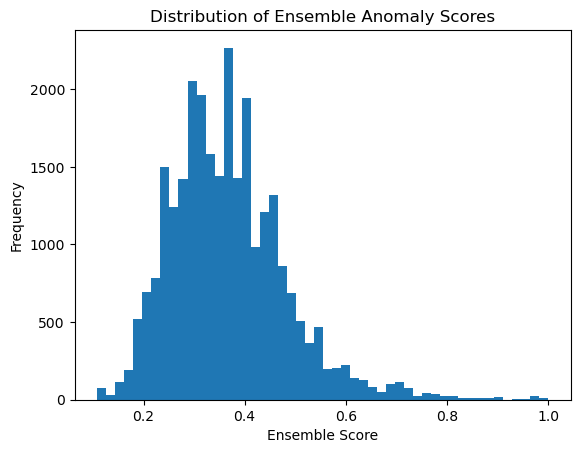

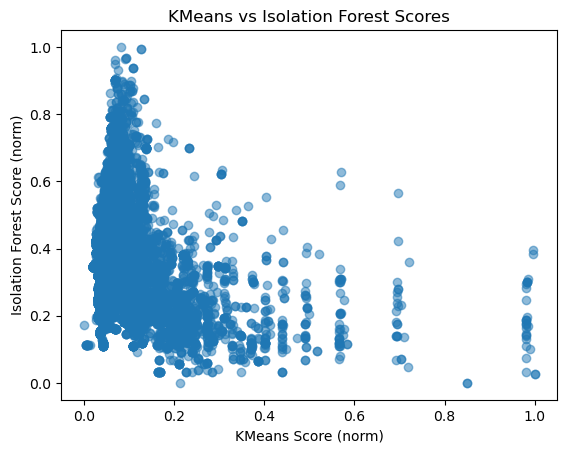

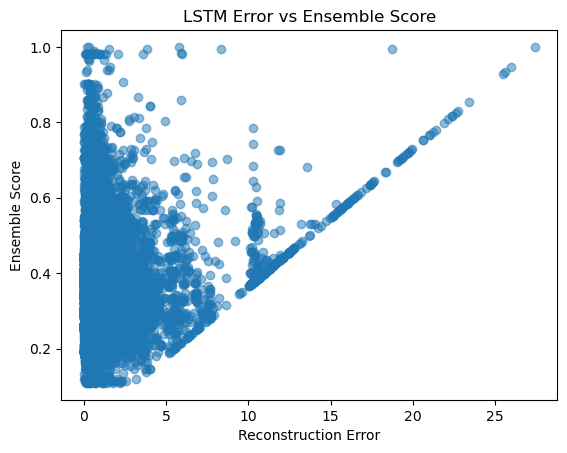

In [31]:
import matplotlib.pyplot as plt

# 1. Distribution of Ensemble Scores
plt.figure()
plt.hist(anomaly_df['ensemble_score'], bins=50)
plt.title('Distribution of Ensemble Anomaly Scores')
plt.xlabel('Ensemble Score')
plt.ylabel('Frequency')
plt.show()

# 2. KMeans vs Isolation Forest Score Scatter
plt.figure()
plt.scatter(
    anomaly_df['kmeans_score_norm'],
    anomaly_df['iso_score_norm'],
    alpha=0.5
)
plt.title('KMeans vs Isolation Forest Scores')
plt.xlabel('KMeans Score (norm)')
plt.ylabel('Isolation Forest Score (norm)')
plt.show()

# 3. LSTM Reconstruction Error vs Ensemble Score
plt.figure()
plt.scatter(
    anomaly_df['recon_error'],
    anomaly_df['ensemble_score'],
    alpha=0.5
)
plt.title('LSTM Error vs Ensemble Score')
plt.xlabel('Reconstruction Error')
plt.ylabel('Ensemble Score')
plt.show()


In [32]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_scaled, kmeans.labels_))


-0.021846427847495725


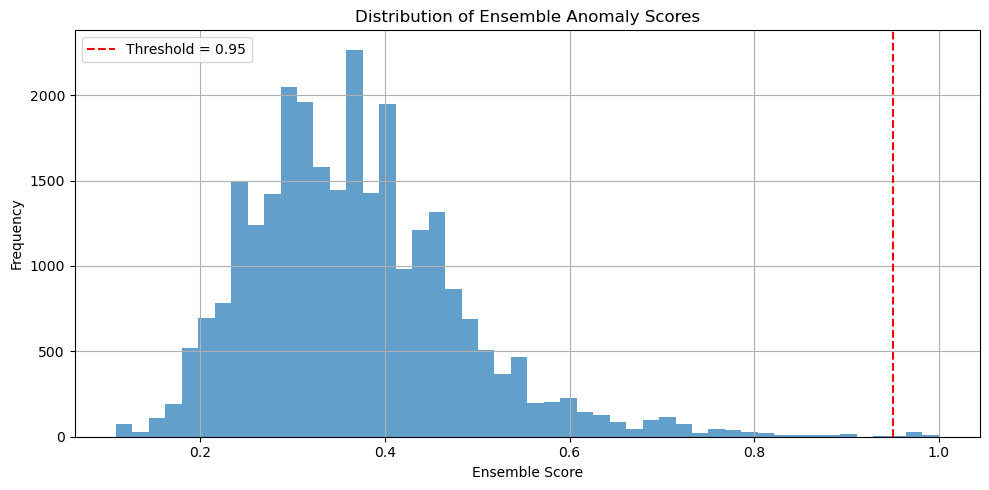

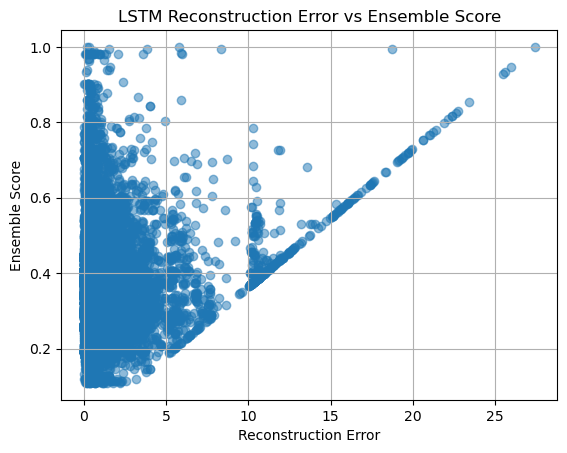

37 anomalies saved to 'top_anomalies.csv'


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter anomalies (assuming ensemble_score is already calculated)
# Adjust threshold if needed
threshold = 0.95
anomaly_df['is_anomaly'] = (anomaly_df['ensemble_score'] > threshold).astype(int)

# Step 2: Get top anomalies sorted by highest ensemble_score
top_anomalies = anomaly_df[anomaly_df.is_anomaly == 1]
top_anomalies_sorted = top_anomalies.sort_values("ensemble_score", ascending=False)

# Step 3: Visualize ensemble score distribution
plt.figure(figsize=(10, 5))
plt.hist(anomaly_df["ensemble_score"], bins=50, alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Distribution of Ensemble Anomaly Scores")
plt.xlabel("Ensemble Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Optional visualization - LSTM error vs Ensemble score
plt.figure()
plt.scatter(anomaly_df['recon_error'], anomaly_df['ensemble_score'], alpha=0.5)
plt.title('LSTM Reconstruction Error vs Ensemble Score')
plt.xlabel('Reconstruction Error')
plt.ylabel('Ensemble Score')
plt.grid(True)
plt.show()

# Step 5: Save anomalies for manual review
top_anomalies_sorted.to_csv("top_anomalies.csv", index=False)
print(f"{len(top_anomalies_sorted)} anomalies saved to 'top_anomalies.csv'")


In [44]:
# Research Paper Visualizations for Fraud Detection Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import pandas as pd

def create_research_visualizations(merged_df, anomaly_df, threshold):
    """
    Create publication-quality visualizations for fraud detection analysis.
    
    Parameters:
    -----------
    merged_df : pandas.DataFrame
        The merged transaction data
    anomaly_df : pandas.DataFrame
        The anomaly detection results
    threshold : float
        The anomaly threshold value
    """
    # Set the style for publication quality plots
    plt.style.use('default')  # Use default style instead of seaborn
    plt.rcParams.update({
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'figure.titlesize': 18,
        'axes.grid': True,
        'grid.alpha': 0.3,
        'axes.facecolor': '#f8f8f8',
        'figure.facecolor': 'white',
        'axes.spines.top': False,
        'axes.spines.right': False
    })

    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    gs = GridSpec(3, 2, figure=fig)

    # 1. Distribution of Transaction Amounts with Anomaly Highlight
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=merged_df, x='transaction amount', bins=50, ax=ax1, color='#2ecc71')
    ax1.set_title('Distribution of Transaction Amounts')
    ax1.set_xlabel('Transaction Amount ($)')
    ax1.set_ylabel('Frequency')
    # Add vertical lines for mean and median
    ax1.axvline(merged_df['transaction amount'].mean(), color='red', linestyle='--', label='Mean')
    ax1.axvline(merged_df['transaction amount'].median(), color='green', linestyle='--', label='Median')
    ax1.legend()

    # 2. Anomaly Score Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    sns.histplot(data=anomaly_df, x='ensemble_score', bins=50, ax=ax2, color='#3498db')
    ax2.axvline(threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
    ax2.set_title('Distribution of Anomaly Scores')
    ax2.set_xlabel('Ensemble Anomaly Score')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    # 3. Correlation between Different Detection Methods
    ax3 = fig.add_subplot(gs[1, 0])
    scatter = ax3.scatter(anomaly_df['kmeans_score_norm'], 
                         anomaly_df['iso_score_norm'],
                         c=anomaly_df['ensemble_score'],
                         cmap='viridis',
                         alpha=0.6)
    ax3.set_title('Correlation: KMeans vs Isolation Forest Scores')
    ax3.set_xlabel('KMeans Score (normalized)')
    ax3.set_ylabel('Isolation Forest Score (normalized)')
    plt.savefig('Correlation', dpi=300, bbox_inches='tight')
    plt.colorbar(scatter, ax=ax3, label='Ensemble Score')

    # 4. LSTM Reconstruction Error Analysis
    ax4 = fig.add_subplot(gs[1, 1])
    scatter = ax4.scatter(anomaly_df['recon_error'],
                         anomaly_df['ensemble_score'],
                         c=anomaly_df['is_anomaly'],
                         cmap='coolwarm',
                         alpha=0.6)
    ax4.set_title('LSTM Reconstruction Error vs Ensemble Score')
    ax4.set_xlabel('Reconstruction Error')
    ax4.set_ylabel('Ensemble Score')
    plt.colorbar(scatter, ax=ax4, label='Is Anomaly')

    # 5. Top Anomalies by Transaction Amount
    ax5 = fig.add_subplot(gs[2, 0])
    top_anomalies = merged_df.iloc[anomaly_df[anomaly_df['is_anomaly'] == 1].index]
    top_anomalies_sorted = top_anomalies.nlargest(10, 'transaction amount')
    sns.barplot(data=top_anomalies_sorted,
                x='transaction amount',
                y='merchant name',
                ax=ax5,
                color='#e74c3c')
    ax5.set_title('Top 10 Anomalies by Transaction Amount')
    ax5.set_xlabel('Transaction Amount ($)')
    ax5.set_ylabel('Merchant Name')

    # 6. Anomaly Distribution by Region
    ax6 = fig.add_subplot(gs[2, 1])
    region_anomalies = merged_df.iloc[anomaly_df[anomaly_df['is_anomaly'] == 1].index]['region'].value_counts()
    sns.barplot(x=region_anomalies.index, y=region_anomalies.values, ax=ax6, color='#9b59b6')
    ax6.set_title('Distribution of Anomalies by Region')
    ax6.set_xlabel('Region')
    ax6.set_ylabel('Number of Anomalies')
    plt.xticks(rotation=45)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('fraud_detection_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_temporal_analysis(merged_df, anomaly_df):
    """
    Create temporal analysis visualizations.
    """
    plt.figure(figsize=(15, 6))
    merged_df['transaction date'] = pd.to_datetime(merged_df['transaction date'])
    anomaly_dates = merged_df.iloc[anomaly_df[anomaly_df['is_anomaly'] == 1].index]['transaction date']
    sns.histplot(data=anomaly_dates, bins=30, color='#2ecc71')
    plt.title('Temporal Distribution of Detected Anomalies')
    plt.xlabel('Transaction Date')
    plt.ylabel('Number of Anomalies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('anomaly_temporal_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_mcc_analysis(merged_df, anomaly_df):
    """
    Create merchant category analysis visualizations.
    """
    plt.figure(figsize=(12, 6))
    mcc_anomalies = merged_df.iloc[anomaly_df[anomaly_df['is_anomaly'] == 1].index]['mcc description'].value_counts().head(10)
    sns.barplot(x=mcc_anomalies.values, y=mcc_anomalies.index, color='#3498db')
    plt.title('Top 10 Merchant Categories with Anomalies')
    plt.xlabel('Number of Anomalies')
    plt.ylabel('Merchant Category')
    plt.tight_layout()
    plt.savefig('mcc_anomaly_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_correlation_analysis(merged_df):
    """
    Create correlation analysis visualizations.
    """
    numerical_features = ['transaction amount', 'mcc', 'merchant zip']
    corr_matrix = merged_df[numerical_features].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.savefig('feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_boxplot_analysis(merged_df, anomaly_df):
    """
    Create boxplot analysis visualizations.
    """
    # Reset indices to avoid duplicate label issues
    plot_data = merged_df.reset_index(drop=True).copy()
    anomaly_data = anomaly_df.reset_index(drop=True).copy()
    
    # Create a new column for anomaly status
    plot_data['is_anomaly'] = anomaly_data['is_anomaly']

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_data, x='is_anomaly', y='transaction amount', color='#2ecc71')
    plt.title('Transaction Amount Distribution: Normal vs Anomalous')
    plt.xlabel('Is Anomaly (0: Normal, 1: Anomaly)')
    plt.ylabel('Transaction Amount ($)')
    plt.tight_layout()
    plt.savefig('transaction_amount_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

def print_summary_statistics(merged_df, anomaly_df):
    """
    Print summary statistics of the analysis.
    """
    # Reset indices to avoid duplicate label issues
    merged_data = merged_df.reset_index(drop=True)
    anomaly_data = anomaly_df.reset_index(drop=True)
    
    region_anomalies = merged_data.iloc[anomaly_data[anomaly_data['is_anomaly'] == 1].index]['region'].value_counts()
    
    print("\nSummary Statistics of Detected Anomalies:")
    print(f"Total number of anomalies detected: {len(anomaly_data[anomaly_data['is_anomaly'] == 1])}")
    print(f"Percentage of transactions flagged as anomalies: {(len(anomaly_data[anomaly_data['is_anomaly'] == 1]) / len(anomaly_data) * 100):.2f}%")
    print("\nTop 5 regions with most anomalies:")
    print(region_anomalies.head())
    print("\nAverage transaction amount of anomalies: $", 
          f"{merged_data.iloc[anomaly_data[anomaly_data['is_anomaly'] == 1].index]['transaction amount'].mean():.2f}")
    print("Average transaction amount of normal transactions: $", 
          f"{merged_data.iloc[anomaly_data[anomaly_data['is_anomaly'] == 0].index]['transaction amount'].mean():.2f}")

# Example usage:
# create_research_visualizations(merged_df, anomaly_df, threshold)
# create_temporal_analysis(merged_df, anomaly_df)
# create_mcc_analysis(merged_df, anomaly_df)
# create_correlation_analysis(merged_df)
# create_boxplot_analysis(merged_df, anomaly_df)
# print_summary_statistics(merged_df, anomaly_df) 

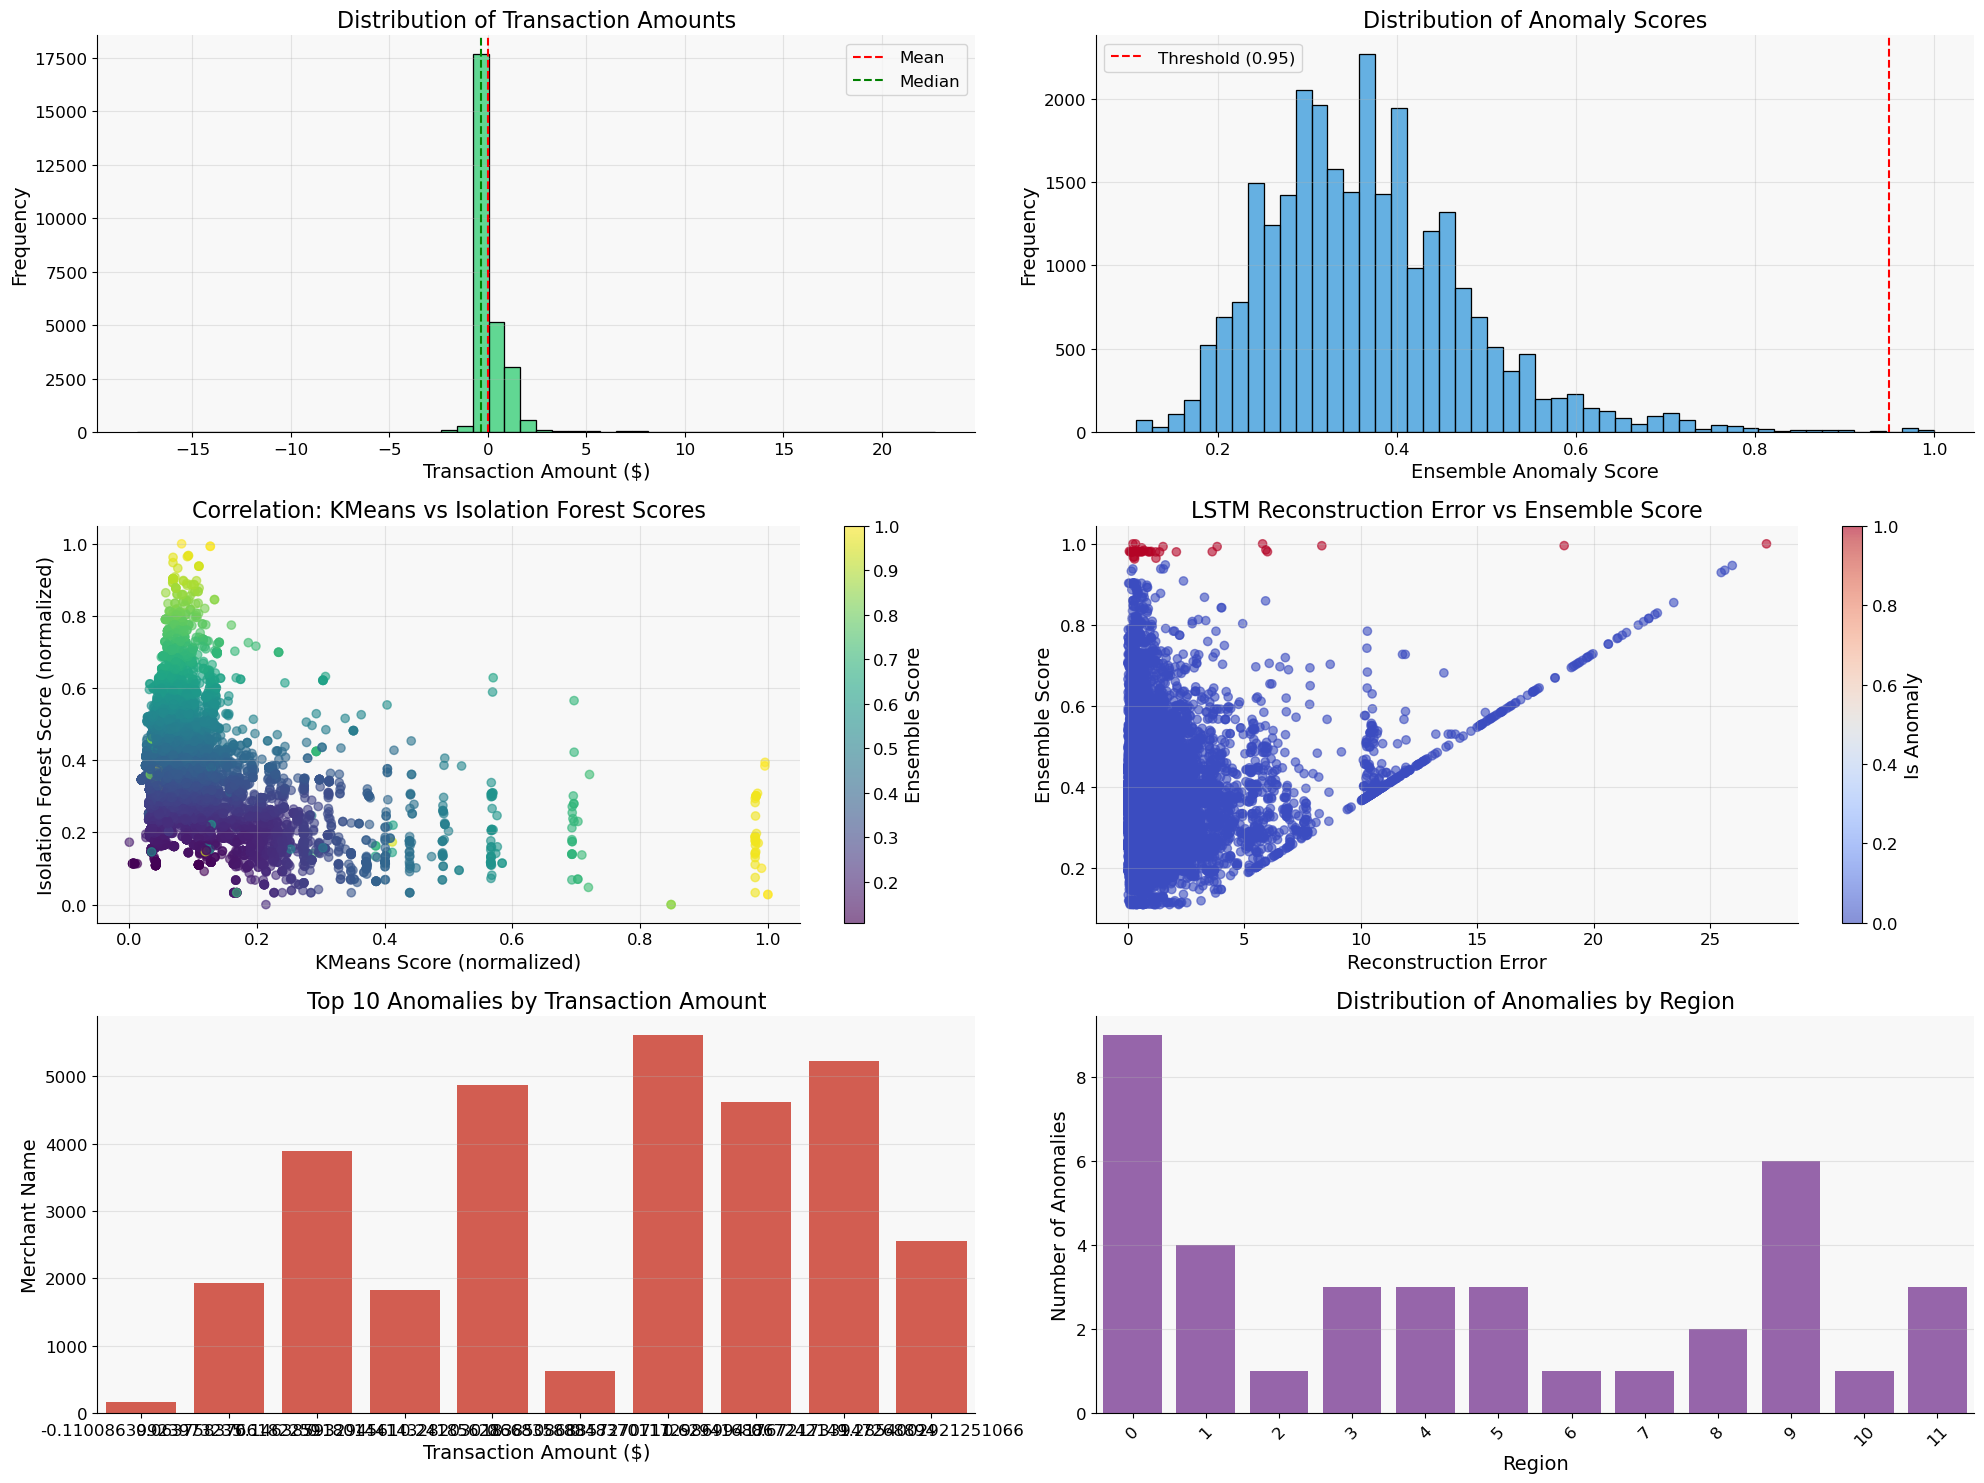

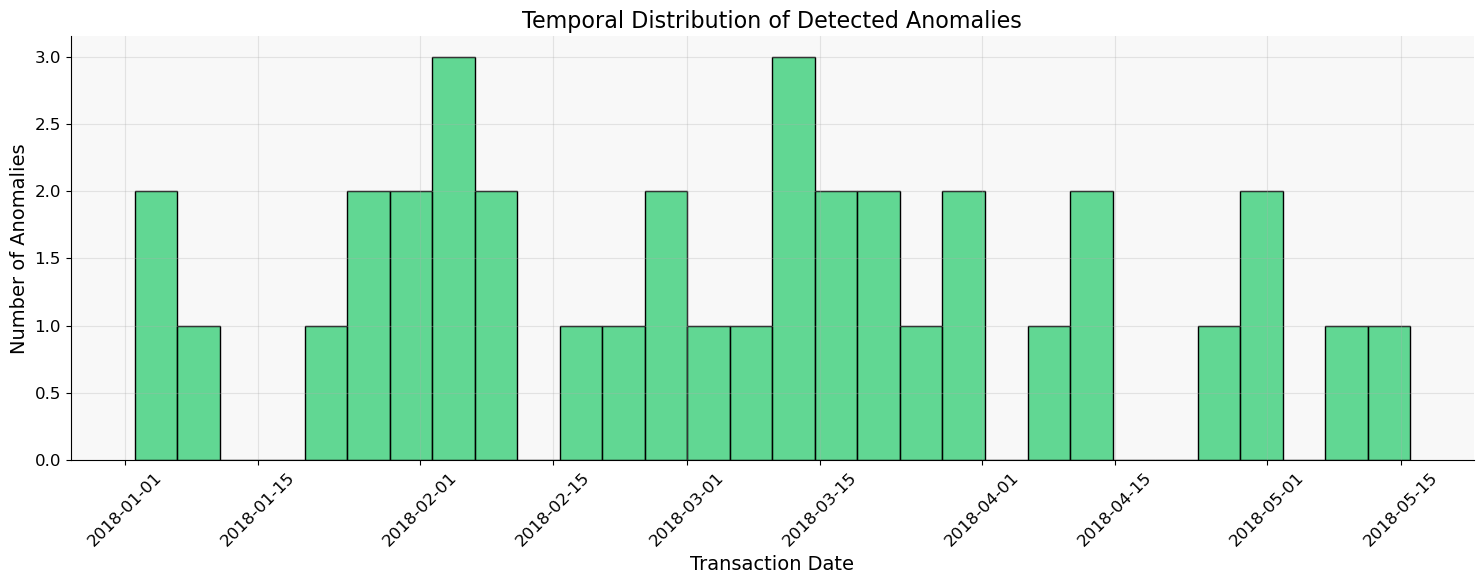

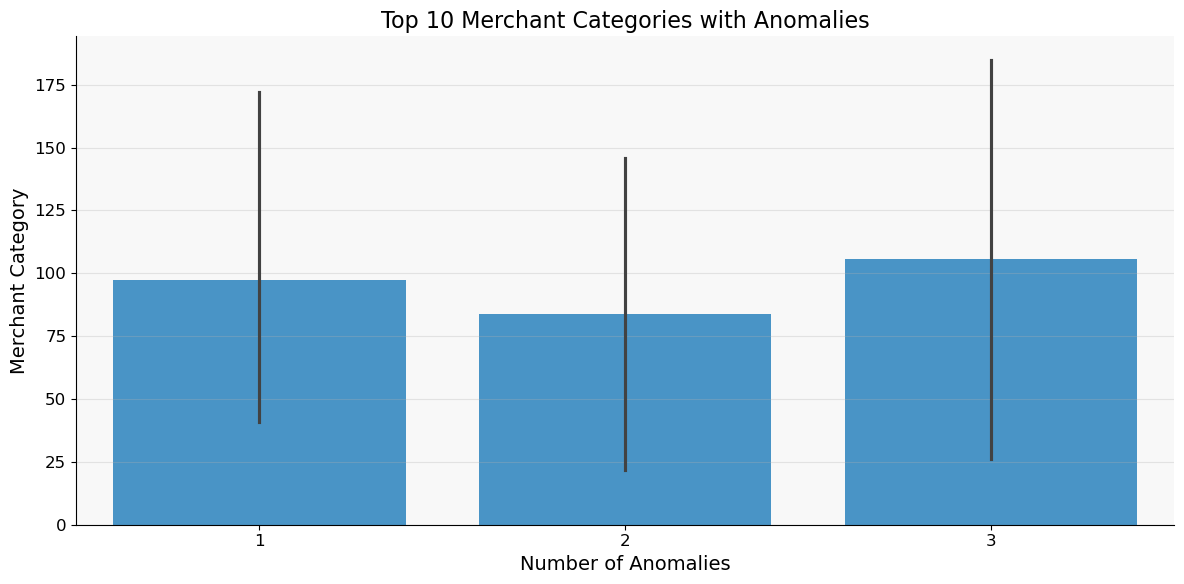

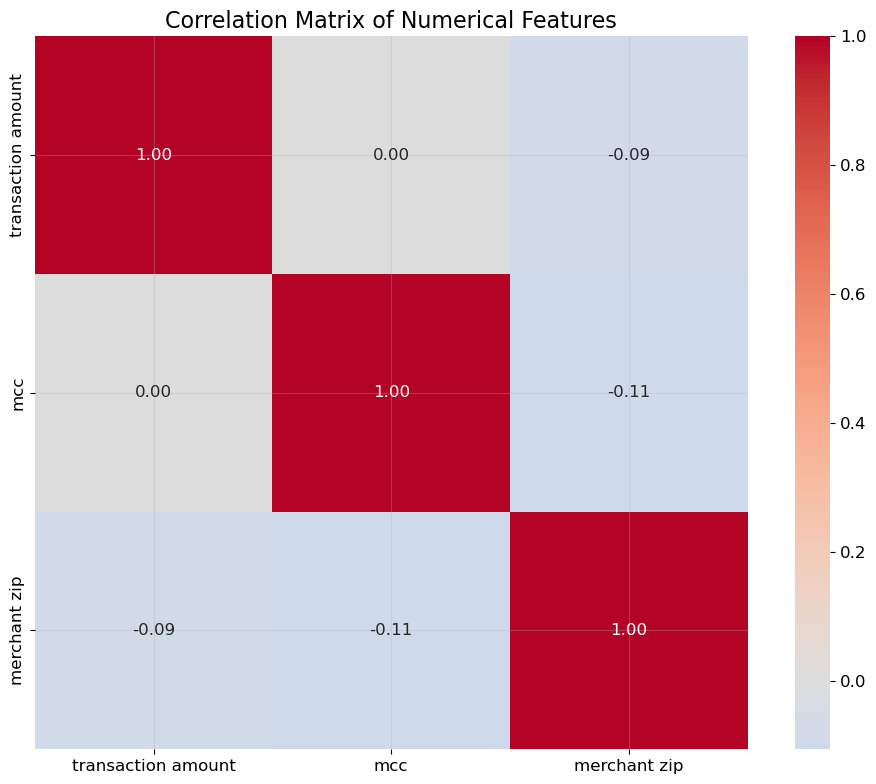

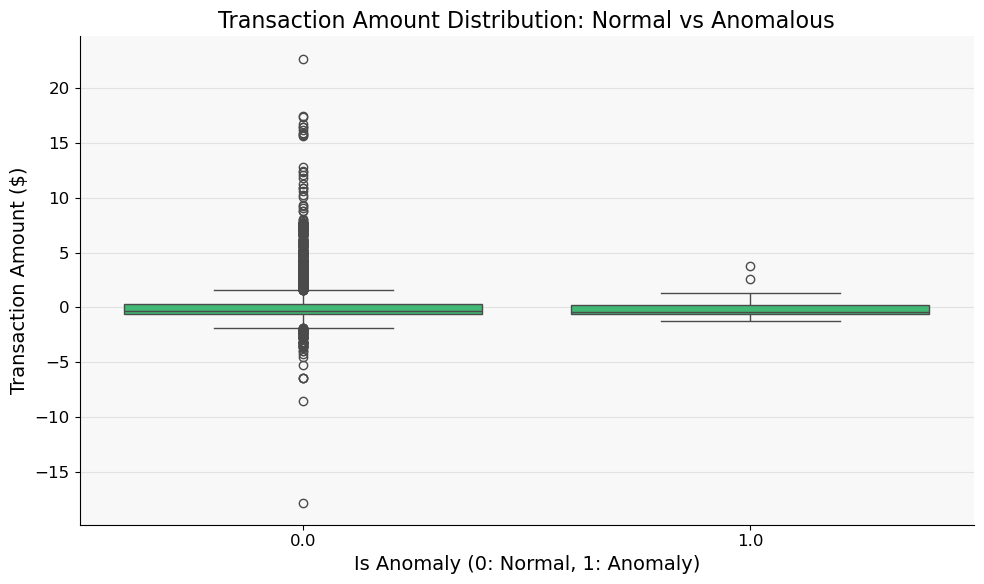


Summary Statistics of Detected Anomalies:
Total number of anomalies detected: 37
Percentage of transactions flagged as anomalies: 0.14%

Top 5 regions with most anomalies:
region
0    11
4     7
5     5
6     4
3     3
Name: count, dtype: int64

Average transaction amount of anomalies: $ -0.04
Average transaction amount of normal transactions: $ 0.00


In [45]:
# Create the main research visualizations
create_research_visualizations(merged_df, anomaly_df, threshold)
# Create temporal analysis
create_temporal_analysis(merged_df, anomaly_df)
# Create MCC analysis
create_mcc_analysis(merged_df, anomaly_df)
# Create correlation analysis
create_correlation_analysis(merged_df)
# Create boxplot analysis
create_boxplot_analysis(merged_df, anomaly_df)
# Print summary statistics
print_summary_statistics(merged_df, anomaly_df)

In [36]:
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['program', 'region', 'hierarchy level 3 name', 'cardholder first name',
       'cardholder last name', 'merchant name', 'merchant state',
       'mcc description', 'transaction type', 'transaction db-cr indicator'],
      dtype='object')


In [37]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['merchant name', 'mcc description', 'transaction type', 'transaction db-cr indicator', 'program','region', 'hierarchy level 3 name','cardholder first name', 'cardholder last name', 'merchant name', 'merchant state']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))
    label_encoders[col] = le


In [38]:
from sklearn.preprocessing import StandardScaler

num_cols = ['transaction amount']
scaler = StandardScaler()
merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])


In [39]:
merged_df.head()

,program,region,hierarchy level 3 name,cardholder first name,cardholder last name,merchant name,merchant state,merchant zip,mcc,mcc description,transaction date,transaction post date,transaction amount,transaction type,transaction db-cr indicator
0,0,0,131,61,307,4046,73,223110000.0,7392.0,31,2018-01-18,2018-01-19,0.234351,1,1
1,0,0,131,61,307,5343,73,201510000.0,5999.0,132,2018-02-05,2018-02-06,-0.842601,0,0
2,0,0,131,61,307,5343,73,201510000.0,5999.0,132,2018-02-02,2018-02-05,-0.506704,1,1
3,0,0,131,61,307,5343,73,201510000.0,5999.0,132,2018-02-05,2018-02-06,-0.516211,1,1
4,0,0,131,61,307,583,13,941030000.0,7399.0,26,2018-02-05,2018-02-06,0.905679,1,1


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assume merged_df is your DataFrame
# Step 1: Select numeric columns only for clustering
numeric_cols = merged_df.select_dtypes(include=['float64', 'int32', 'int64']).columns
X = merged_df[numeric_cols]

# Step 2: Optionally scale the data (recommended for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Create new_df and drop non-numeric columns
new_df = merged_df.copy()
new_df = new_df.drop(['transaction date', 'transaction post date'], axis=1, errors='ignore')

# Step 5: Calculate anomaly score (distance to cluster center)
# Compute distances from each point to its assigned cluster center
distances = np.zeros(len(new_df))
for i in range(5):  # Iterate over each cluster
    mask = new_df['kmeans_cluster'] == i
    if mask.sum() > 0:  # Check if cluster has points
        cluster_points = scaler.transform(new_df.loc[mask, numeric_cols])
        distances[mask] = np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1)

new_df['kmeans_anomaly_score'] = distances

# View results
print(new_df[['kmeans_cluster', 'kmeans_anomaly_score']].head())

   kmeans_cluster  kmeans_anomaly_score
0               0              2.402148
1               4              2.950214
2               2              2.525085
3               2              2.526784
4               3              2.834238
